In [1]:
import os
import fnmatch
from random import shuffle
import json
from src.config import config_io
from pathlib import Path
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
config_io.keys()

dict_keys(['pan_19_original_train', 'pan_19_original_test', 'pan_19_processed_train', 'pan_19_processed_test', 'pan_20_original_train_narrow', 'pan_20_original_train_wide', 'pan_20_original_test_narrow', 'pan_20_original_test_wide', 'pan_20_processed_test_narrow', 'pan_20_processed_test_wide', 'pan_20_processed_train_narrow', 'pan_20_processed_train_wide', 'pan_21_original_train', 'pan_21_original_test', 'pan_21_processed_train', 'pan_21_processed_test'])

In [3]:
data = pd.read_csv(config_io['pan_21_processed_train'])

In [4]:
data.head()

,problem,author_1,author_2,para1_text,para2_text
0,problem-4845.txt,1,1,I can't see the names (as you've properly reda...,Does it have anything to do that in this parti...
1,problem-4845.txt,1,1,Does it have anything to do that in this parti...,I am having a problem with connectivity in one...
2,problem-4845.txt,1,1,I am having a problem with connectivity in one...,Aliases are a way for the client to be redirec...
3,problem-4845.txt,1,1,Aliases are a way for the client to be redirec...,It doesn't deal with any of that. It specifica...
4,problem-9721.txt,3,3,"here is no non-root command, but a root comman...","For my situation, the use of locking is not su..."


In [5]:
data.shape

(65601, 5)

In [6]:
len(data[data['author_1'] != data['author_2']])/len(data)

0.0

In [7]:

def get_stats(data, quantile_val, ret = "stats"):
    p1_series = data.apply(lambda x : len(x[3]), axis = 1)
    p2_series = data.apply(lambda x : len(x[4]), axis = 1)
    series = pd.concat([p1_series, p2_series])
    #print(series)
    #series.plot.hist(bins = 5)
    #print("Length:", len(data))
    #print("Mean:", series.mean())
    #print("Std. Dev.:", series.std())
    print(f'quantile: {quantile_val}, Length: {len(data)},Mean: {series.mean():.2f}, Std. Dev.: {series.std():.2f} ')
    if ret=="stats":
        return len(data), series.mean(), series.std()
    elif ret == "series":
        return series
    else:
        print("Return value not identified! None returned")


In [8]:
series = get_stats(data, 1, ret = "series")

quantile: 1, Length: 65601,Mean: 250.48, Std. Dev.: 140.52 


Text(0, 0.5, 'Frequency')

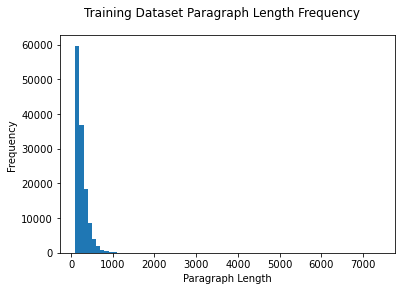

In [9]:
#ax = series.plot.hist()
binwidth = 100
fig, ax = plt.subplots()
plt.hist(series, bins=np.arange(min(series), max(series) + binwidth, binwidth))
plt.suptitle("Training Dataset Paragraph Length Frequency")
ax.set_xlabel("Paragraph Length")
ax.set_ylabel("Frequency")

In [52]:
n = 400
data_lower = data[data.apply(lambda x : (len(x[3])> n) & (len(x[4])>n), axis = 1) ]
data_lower.shape

(8326, 5)

In [54]:
series = get_stats(data_lower, 1, ret = "series")

quantile: 1, Length: 8326,Mean: 1276.95, Std. Dev.: 898.42 
